In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import math

In [2]:
FRAMES = 4_000

In [3]:
def p_uni(i: int, j: int, tau: int, I: int):
    '''
    PDF for sampling f_j given reference frame f_i.
    '''

    p = 1 / (min(tau, i) + min(tau, I - i - 1))

    if j != i and j <= i + tau and j >= i - tau:
        return p
    else:
        return 0

In [4]:
def p_nml(i: int, j: int, sigma: float, I):
    '''
    PDF for sampling f' given reference frame f.
    '''
    x = np.arange(I)
    pdf = stats.norm.pdf(x, i, sigma)
    pdf[i] = 0.0
    p = pdf[j] / pdf.sum()

    return p

In [5]:
pdf_15 = [p_uni(15, f_d, 5.0, I=FRAMES) for f_d in range(FRAMES)]

1.0


<BarContainer object of 4000 artists>

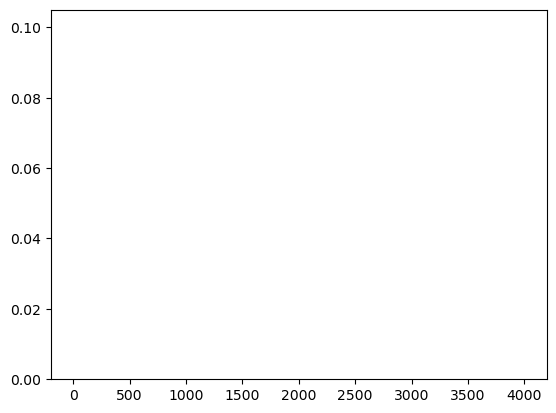

In [6]:
print(np.array(pdf_15).sum())
plt.bar(np.arange(FRAMES), pdf_15)